# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/4

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
#key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정
UTILS = "/content/resources/utils"   # git clone 경로
FIGS  = os.path.join(BASE, "figures")
os.makedirs(FIGS, exist_ok=True)

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_Fi

## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


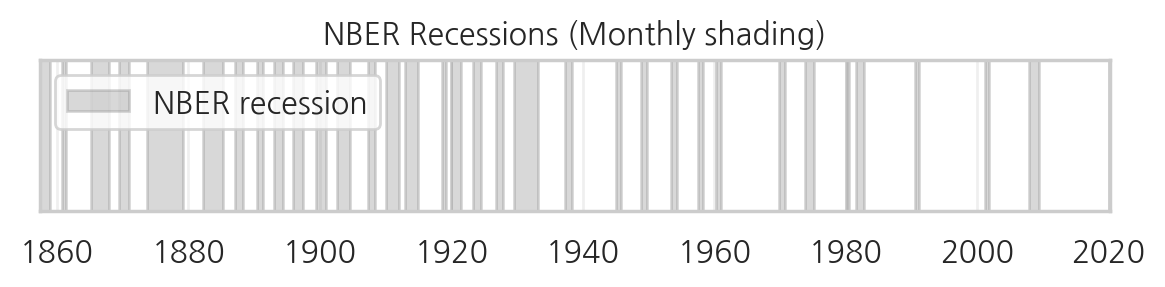

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## 다양한 형태의 수익률 곡선


In [4]:
# Treasury Constant Maturity Rate
# 1m, 3m, 6m, 1y, 2y, 5y, 10y, 20y, 30y

from datetime import datetime

#var_list = ['DGS1MO','DGS3MO','DGS6MO','DGS1','DGS2','DGS5','DGS10','DGS20','DGS30']
#var_list = ['DGS3MO','DGS2','DGS5','DGS10','DGS20','DGS30']
var_list = ['DGS3MO','DGS6MO','DGS1','DGS2','DGS3','DGS5','DGS10','DGS30']

date_yieldcurve = ['20041215','20000911','20060214','19891004']

yieldcurve = pd.DataFrame([])

for dt in date_yieldcurve:
  dts = datetime.strptime(dt, '%Y%m%d')
  year = dts.year
  month = dts.month
  day = dts.day

  start = datetime(year,month,day)
  end = datetime(year,month,day)

  df = pdr.get_data_fred(var_list, start=start, end=end)
  #yieldcurve = yieldcurve.append(df, ignore_index=True)
  yieldcurve = pd.concat([yieldcurve, df], ignore_index=True)

In [5]:
print(yieldcurve)

   DGS3MO  DGS6MO  DGS1  DGS2  DGS3  DGS5  DGS10  DGS30
0   2.210   2.470 2.640 2.970 3.140 3.480  4.090  4.760
1   6.110   6.230 6.200 6.120 6.050 5.970  5.770  5.730
2   4.550   4.720 4.710 4.690 4.680 4.610  4.620  4.600
3   8.050   8.320 8.410 8.370 8.370 8.250  8.220  8.160


In [6]:
yieldcurve = yieldcurve.T
yieldcurve.columns = ['upward-sloping','inverted','flat','hump-shaped']
yieldcurve.index  =['3M', '6M','1Y','2Y','3Y','5Y','10Y','30Y']

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/yieldcurves.png


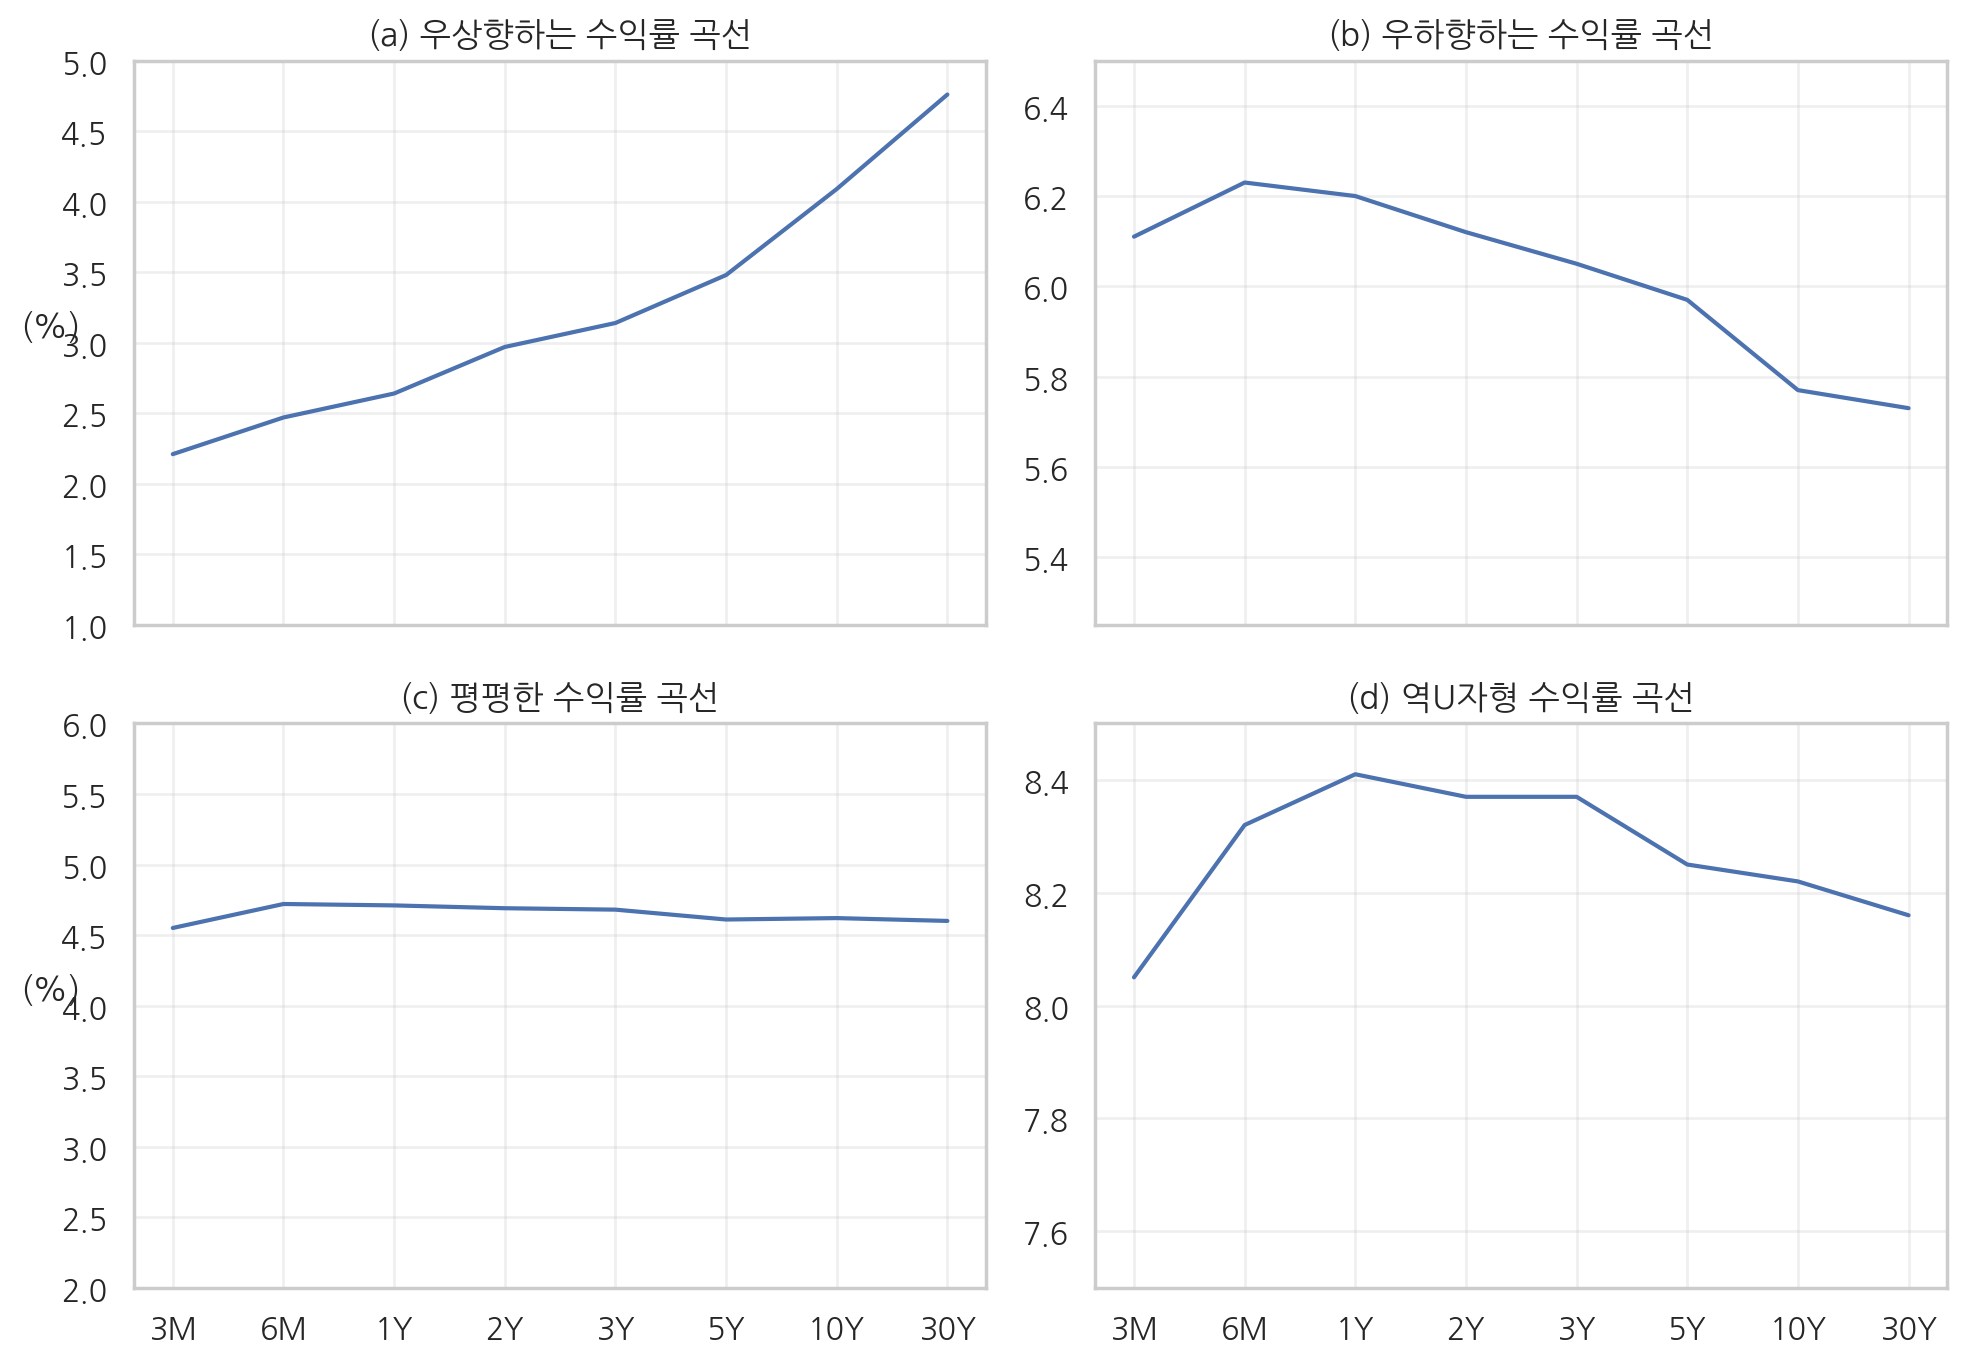

In [7]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,7), sharex=True)

ax1.plot(yieldcurve['upward-sloping'])
ax2.plot(yieldcurve['inverted'])
ax3.plot(yieldcurve['flat'])
ax4.plot(yieldcurve['hump-shaped'])

ax1.set_ylim([1,5])
ax2.set_ylim([5.25,6.5])
ax3.set_ylim([2,6])
ax4.set_ylim([7.5,8.5])

ax1.set_title('(a) 우상향하는 수익률 곡선')
ax2.set_title('(b) 우하향하는 수익률 곡선')
ax3.set_title('(c) 평평한 수익률 곡선')
ax4.set_title('(d) 역U자형 수익률 곡선')

ax1.set_ylabel('(%)', rotation=0)
ax3.set_ylabel('(%)', rotation=0)

save_fig('yieldcurves')

plt.show()

## 수익률 곡선과 미래 이자율

In [10]:
ytms = np.array([0.03,0.05,0.07,0.09])

for i, ytm in enumerate(ytms):
  print(f'when ytm is {ytm}, bond price is:')
  print(1000/(1+ytm)**(i+1))

when ytm is 0.03, bond price is:
970.8737864077669
when ytm is 0.05, bond price is:
907.0294784580499
when ytm is 0.07, bond price is:
816.297876890852
when ytm is 0.09, bond price is:
708.4252110651963


In [11]:
((1.05)**2)/1.03 - 1

0.07038834951456319

In [12]:
((1.07)**3)/((1.05)**2)-1

0.11115011337868497

In [13]:
Er2 = (1.03*1.05)**(0.5)-1
print(Er2)
print(1000/(1+Er2)**2)

0.03995192196562636
924.6417013407304


In [14]:
f2 = (1.03*1.07)**(0.5)-1
print(f2)
print(1000/(1+f2)**2)

0.049809506529637115
907.3586788857633


In [15]:
(1.05*1.06*1.06)**(1/3)

1.0566561292003909

## 리스크 프리미엄과 수익률 곡선

In [16]:
r1, Er2, Er3 = 5, 5, 5
premium2, premium3 = 1, 1
f2 = Er2 + premium2
f3 = Er3 + premium3
y2 = np.sqrt((1+r1)*(1+f2))-1
y3 = (((1+r1)*(1+f2)*(1+f3))**(1/3))-1

yc_example = pd.DataFrame({'기대 이론':[r1,Er2,Er3],'유동성 선호설':[r1,y2,y3]}, index=[1,2,3])
print(yc_example.transpose())

            1     2     3
기대 이론   5.000 5.000 5.000
유동성 선호설 5.000 5.481 5.649


In [17]:
(1.05*1.06)**(0.5)

1.0549881515922348

In [18]:
(1.180)**(1/3)

1.0567218052587208

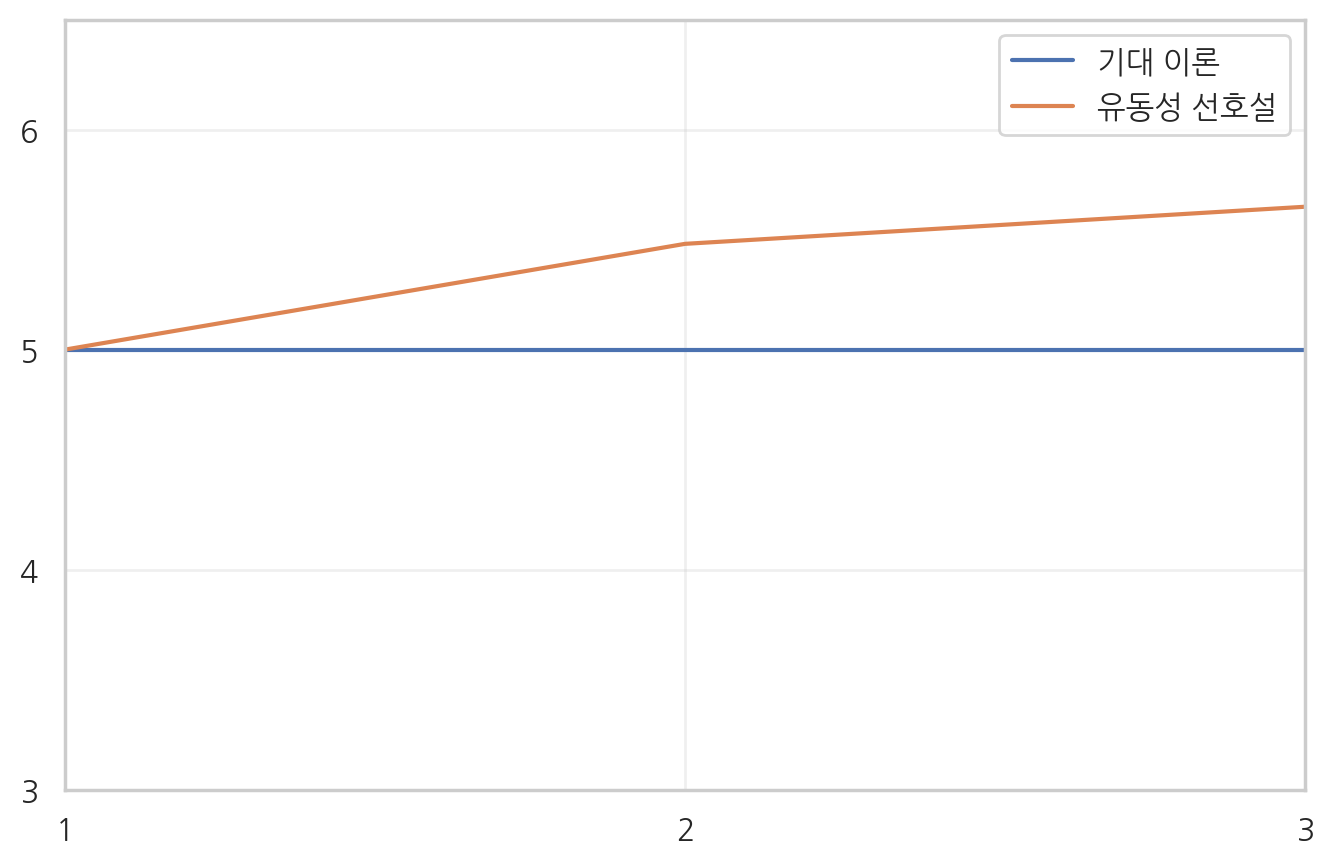

In [ ]:
plt.plot(yc_example, label=yc_example.columns)

plt.ylim([3,6.5])
plt.xlim([1,3])

plt.xticks([1,2,3])
plt.yticks([3,4,5,6])
plt.legend()

plt.show()

## 장단기 금리차(기간 스프레드)와 불황

In [22]:
# GS3M is available from 1982

var_list = ['FEDFUNDS','GS3M','GS10']
start = datetime(1982,1,1)
end = datetime(2021,7,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
df['term spread'] = df.GS10 - df.GS3M
print(df.head())

            FEDFUNDS   GS3M   GS10  term spread
DATE                                           
1982-01-01    13.220 12.920 14.590        1.670
1982-02-01    14.780 14.280 14.430        0.150
1982-03-01    14.680 13.310 13.860        0.550
1982-04-01    14.940 13.340 13.870        0.530
1982-05-01    14.450 12.710 13.620        0.910


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/term_spread.png


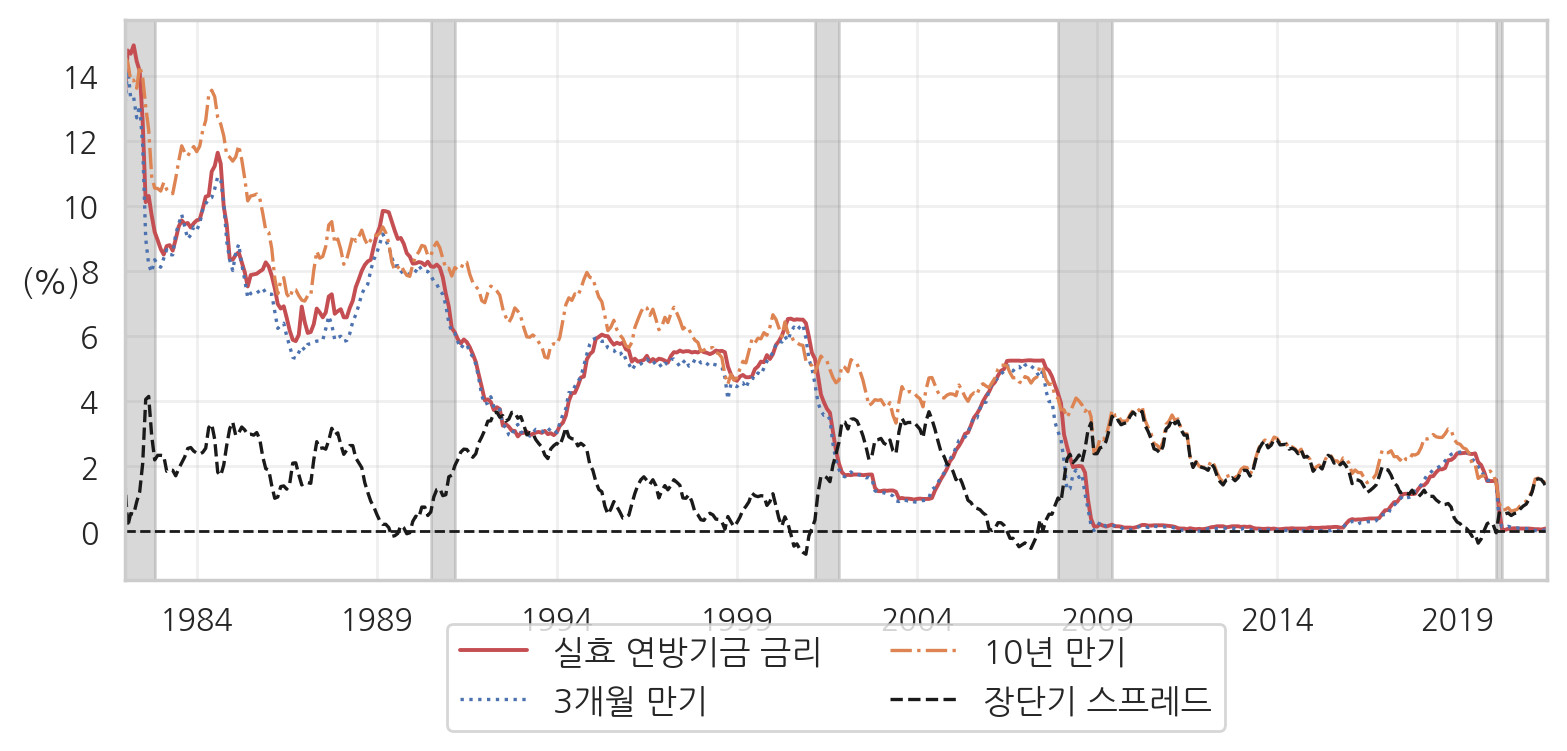

In [23]:
start_year = '1982'
end_year   = '2023'

fig, ax = plt.subplots(figsize=(8,4))

# -----------------------------
# Lines
# -----------------------------
df.loc[start_year:end_year, 'FEDFUNDS'] \
    .plot(ax=ax, color='r', linewidth=1.4, label='실효 연방기금 금리')

df.loc[start_year:end_year, 'GS3M'] \
    .plot(ax=ax, linestyle='dotted', linewidth=1.2, label='3개월 만기')

df.loc[start_year:end_year, 'GS10'] \
    .plot(ax=ax, linestyle='dashdot', linewidth=1.2, label='10년 만기')

df.loc[start_year:end_year, 'term spread'] \
    .plot(ax=ax, linestyle='dashed', color='k', linewidth=1.2,
          label='장단기 스프레드')

# -----------------------------
# Reference lines
# -----------------------------
ax.axhline(0, color='k', linestyle='dashed', linewidth=1)

# -----------------------------
# NBER recessions (robust)
# -----------------------------
plot_nber_recession(ax, NBERm, clip_to_xlim=False, keep_xlim=True)

# -----------------------------
# Formatting
# -----------------------------
ax.legend(
    fontsize=12,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=2
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.yaxis.set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.0f}')
)

ax.grid(True)
ax.margins(x=0)

save_fig('term_spread')
plt.show()


## Great Moderation

In [24]:
# quarterly real GDP: Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate

start = datetime(1947,1,1)
end = datetime(2019,3,31)

GDP= pdr.get_data_fred(['GDPC1'], start=start, end=end)
print(GDP.head())

               GDPC1
DATE                
1947-01-01 2,182.681
1947-04-01 2,176.892
1947-07-01 2,172.432
1947-10-01 2,206.452
1948-01-01 2,239.682


In [25]:
# annualize
GDP['growth'] = GDP.pct_change()*400
GDP.head()

,GDPC1,growth
DATE,,
1947-01-01,"2,182.681",NaN
1947-04-01,"2,176.892",-1.061
1947-07-01,"2,172.432",-0.820
1947-10-01,"2,206.452",6.264
1948-01-01,"2,239.682",6.024


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/GreatModeration.png


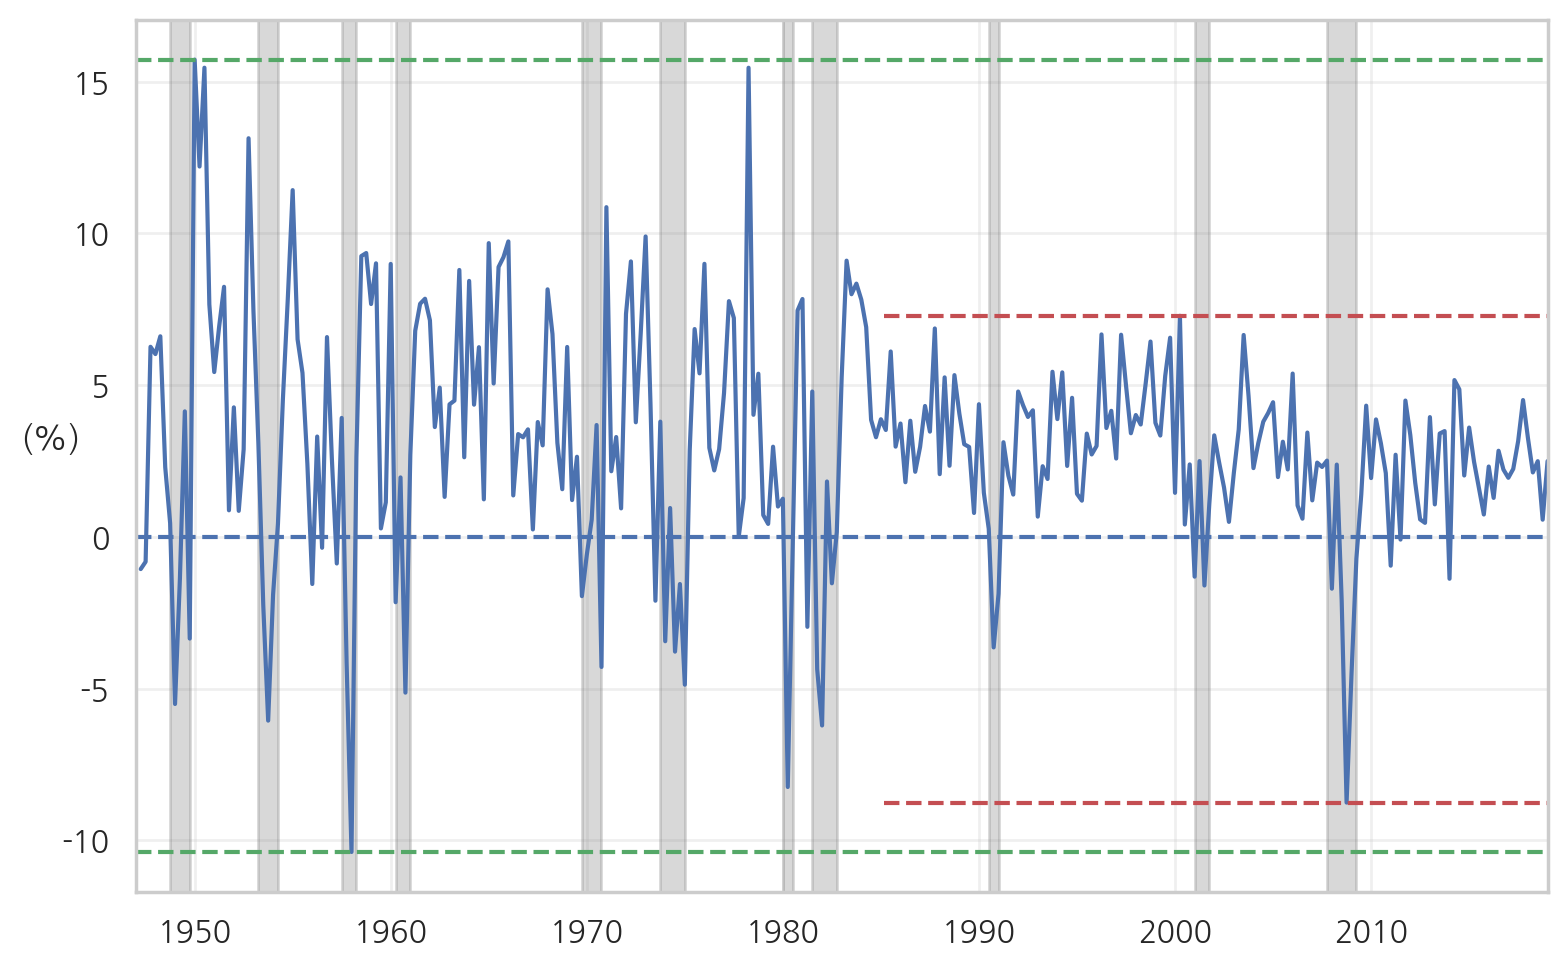

In [26]:
start_year = 1945
end_year=2019

fig, ax = plt.subplots()

GDP['growth'].plot(ax=ax)

plot_nber_recession(ax, NBERq)

plt.axhline(y = 0, color='b',linestyle='dashed')
plt.axhline(y = GDP['growth'].max(), color='g',linestyle='dashed')
plt.axhline(y = GDP['growth'].min(), color='g',linestyle='dashed')
plt.axhline(y = GDP.loc['1985':'2019','growth'].max(), xmin=0.53, xmax=1.0,  color='r', linestyle='dashed')
plt.axhline(y = GDP.loc['1985':'2019','growth'].min(), xmin=0.53, xmax=1.0, color='r', linestyle='dashed')

ax.set_ylabel('(%)', rotation=0)

ax.set_xlabel('')
ax.grid(True)

save_fig('GreatModeration')

## 연습문제
### 최근 기간 스프레드(2018년-최근)

In [28]:
var_list = ['FEDFUNDS','GS3M','GS10']
start = datetime(2018,1,1)
end = datetime(2024,4,30)
df = pdr.get_data_fred(var_list, start=start, end=end)
df['term spread'] = df.GS10 - df.GS3M
df.head()

,FEDFUNDS,GS3M,GS10,term spread
DATE,,,,
2018-01-01,1.410,1.430,2.580,1.150
2018-02-01,1.420,1.590,2.860,1.270
2018-03-01,1.510,1.730,2.840,1.110
2018-04-01,1.690,1.790,2.870,1.080
2018-05-01,1.700,1.900,2.980,1.080


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/termspread_2023.png


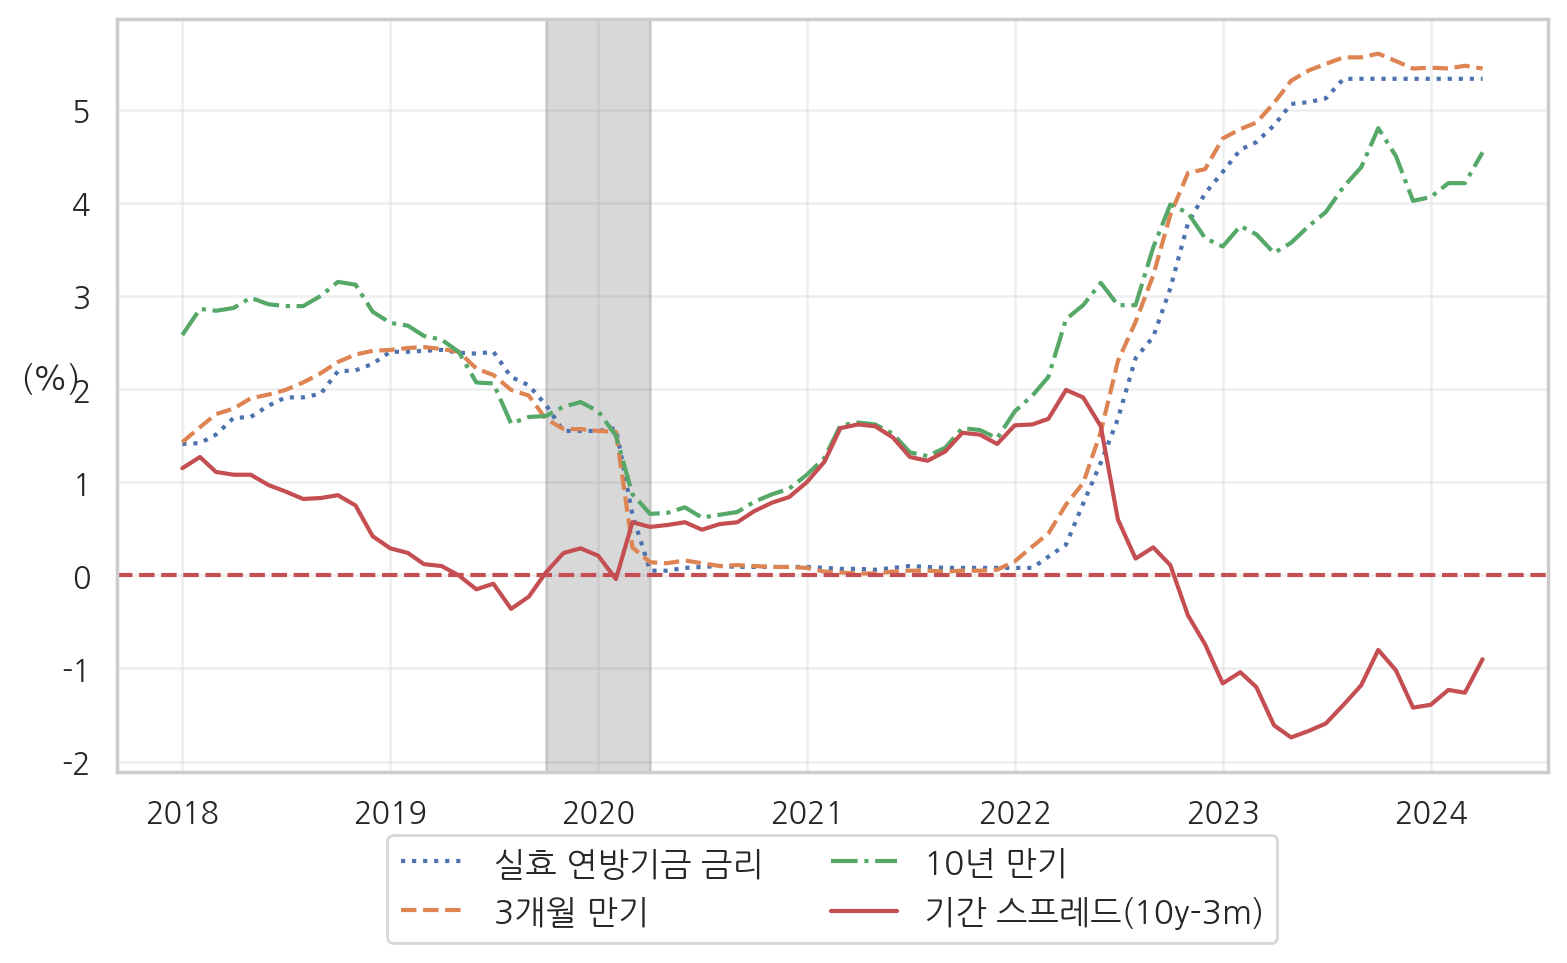

In [29]:
fig, ax = plt.subplots()

ax.plot(df['FEDFUNDS'], linestyle='dotted')
ax.plot(df['GS3M'], linestyle='dashed')
ax.plot(df['GS10'], linestyle='dashdot')
ax.plot(df['term spread'])

plot_nber_recession(ax, NBERq)

plt.axhline(y = 0, color='r',linestyle='dashed')

plt.legend(['실효 연방기금 금리','3개월 만기', '10년 만기', '기간 스프레드(10y-3m)'],
           fontsize = 12, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)
ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

save_fig('termspread_2023')

plt.show()